# Modelos y Representaciones de Datos

El objetivo de este notebook es entender, usando un dataset de clasificación sencillo, cómo funcionan distintos modelos de Machine Learning destacando sus ventajas y desventajas. 

También permite entender, para estos distintos modelos, cómo afecta la definición de sus hiperparámetros a las predicciones luego del entrenamiento.

Finalmente se muestra cómo crear una red neuronal pequeña con Keras y entrenarla para resolver este problema, visualizando su aprendizaje durante el entrenamiento y la representación de los datos en su capa "oculta".

In [ ]:
!git clone https://github.com/JuanCruzC97/ml-stuff.git

In [ ]:
cd ml-stuff/representations

In [1]:
# Librerías para el manejo de los datos.
import pandas as pd
import numpy as np

# Librerías para visualización.
import plotly.express as px
import matplotlib.pyplot as plt

# Funciones propias.
from utils.datasets import make_classification_dataset

# Dataset

In [115]:
# Creamos un set de entrenamiento y evaluación.
train = make_classification_dataset(n_samples=500, noise=0.1, factor_0=0.6, factor_1=0.2, random_state=42)
test = make_classification_dataset(n_samples=200, noise=0.1, factor_0=0.6, factor_1=0.2, random_state=65)

In [116]:
# Visualizamos los datos de entrenamiento y evalaución.
px.scatter(data_frame=train,                                        # Pasamo el datset
           x="X1",                                                  # Variable en eje X
           y="X2",                                                  # Variable en eje Y
           color="y",                                               # Usamos el color para representar a la variable respuesta
           symbol="y",                                              # Usamos el símbolo de los puntos para representar la variable respuesta
           color_discrete_sequence=["#3d5a80", "#ff6700"],          # Definimos los colores de las clases
           symbol_sequence=["circle", "x"],                         # Definimos los símbolos de las clases
           title="Train Data",                                      # Título del gráfico
           height=600,                                              # Alto del gráfico
           width=600,                                               # Ancho del gráfico
           template="plotly_white").show()                          # Estilo del gráfico

# Visualizamos los datos de entrenamiento y evalaución.
px.scatter(data_frame=test,                                         # Pasamo el datset
           x="X1",                                                  # Variable en eje X
           y="X2",                                                  # Variable en eje Y
           color="y",                                               # Usamos el color para representar a la variable respuesta
           symbol="y",                                              # Usamos el símbolo de los puntos para representar la variable respuesta
           color_discrete_sequence=["#3d5a80", "#ff6700"],          # Definimos los colores de las clases
           symbol_sequence=["circle", "x"],                         # Definimos los símbolos de las clases
           title="Test Data",                                       # Título del gráfico
           height=600,                                              # Alto del gráfico
           width=600,                                               # Ancho del gráfico
           template="plotly_white").show()                          # Estilo del gráfico

# Models

Ahora tomaremos los datos de entrenamiento generados y vamos a entrenar distintos modelos para poder predecir la variable respuesta. Podemos usar los datos de evaluación (no vistos por el modelo en el entrenamiento) para entender cómo funciona el modelo en datos que no vio previamente.

Al ser un problema de clasificación balanceado podemos usar *accuracy* como métrica para evaluar el desempeño.

$$Accuracy=\frac{TP+TN}{TP+FP+TN+FN}$$

In [94]:
# Importamos funciones para el cálculo de métricas.
from sklearn.metrics import accuracy_score
from utils.metrics import display_confusion_matrix

## Logistic Regression

"Descripción de Regresión Lineal + Ventajas y Desventajas"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://mlu-explain.github.io/logistic-regression/

In [95]:
# Importamos 
from sklearn.linear_model import LogisticRegression

In [96]:
# Iniciamos y entrenamos el modelo logístico con los datos de entrenamiento.
logistic = LogisticRegression(penalty="none", random_state=45)
logistic.fit(X=train[["X1", "X2"]], y=train["y"])

LogisticRegression(penalty='none', random_state=45)

Cuando evaluamos el modelo logístico tanto sobre los datos de entrenamiento como en los datos de evaluación podemos ver que tiene una capacidad de predicción similar a tirar una moneda para predecir la clase.

Esto se debe a que el modelo Logistico genera una separación lineal a partir de las variables explicativas.

In [97]:
# Guardamos en los sets de train y test sus predicciones para cada observación.
train["y_logistic"] = pd.Series(logistic.predict(train[["X1", "X2"]]), dtype="category")
test["y_logistic"] = pd.Series(logistic.predict(test[["X1", "X2"]]), dtype="category")

# Imprimimos las métricas para evaluar el ajuste del modelo.
print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_logistic"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_logistic"]),2)}')

Train Accuracy: 0.53
Test Accuracy: 0.49


In [98]:
# Vemos la matriz de confusión de las predicciones del modelo.
display_confusion_matrix(y_true=train["y"], y_pred=train["y_logistic"])

,0 Pred,1 Pred
0 True,130,120
1 True,116,134


In [99]:
# Graficamos los datos, donde el símbolo representa la clase real y el color la clase predicha.
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_logistic",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"],
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")

## KNN

"Descripción de KKN + Ventajas y Desventajas"

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
k = 5

knn = KNeighborsClassifier(k)
knn.fit(X=train[["X1", "X2"]], y=train["y"])

KNeighborsClassifier()

In [112]:
train["y_knn"] = pd.Series(knn.predict(train[["X1", "X2"]]), dtype="category")
test["y_knn"] = pd.Series(knn.predict(test[["X1", "X2"]]), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_knn"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_knn"]),2)}')

Train Accuracy: 0.97
Test Accuracy: 0.96


In [113]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_knn"])

,0 Pred,1 Pred
0 True,243,7
1 True,6,244


In [114]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_knn",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"],
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")

## Tree


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [38]:
max_depth=2
max_leaf_nodes=None

tree = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
tree.fit(X=train[["X1", "X2"]], y=train["y"])

DecisionTreeClassifier(max_depth=2, random_state=42)

In [39]:
train["y_tree"] = pd.Series(tree.predict(train[["X1", "X2"]]), dtype="category")
test["y_tree"] = pd.Series(tree.predict(test[["X1", "X2"]]), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_tree"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_tree"]),2)}')

Train Accuracy: 0.81
Test Accuracy: 0.81


In [40]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_tree"])

,0 Pred,1 Pred
0 True,159,91
1 True,2,248


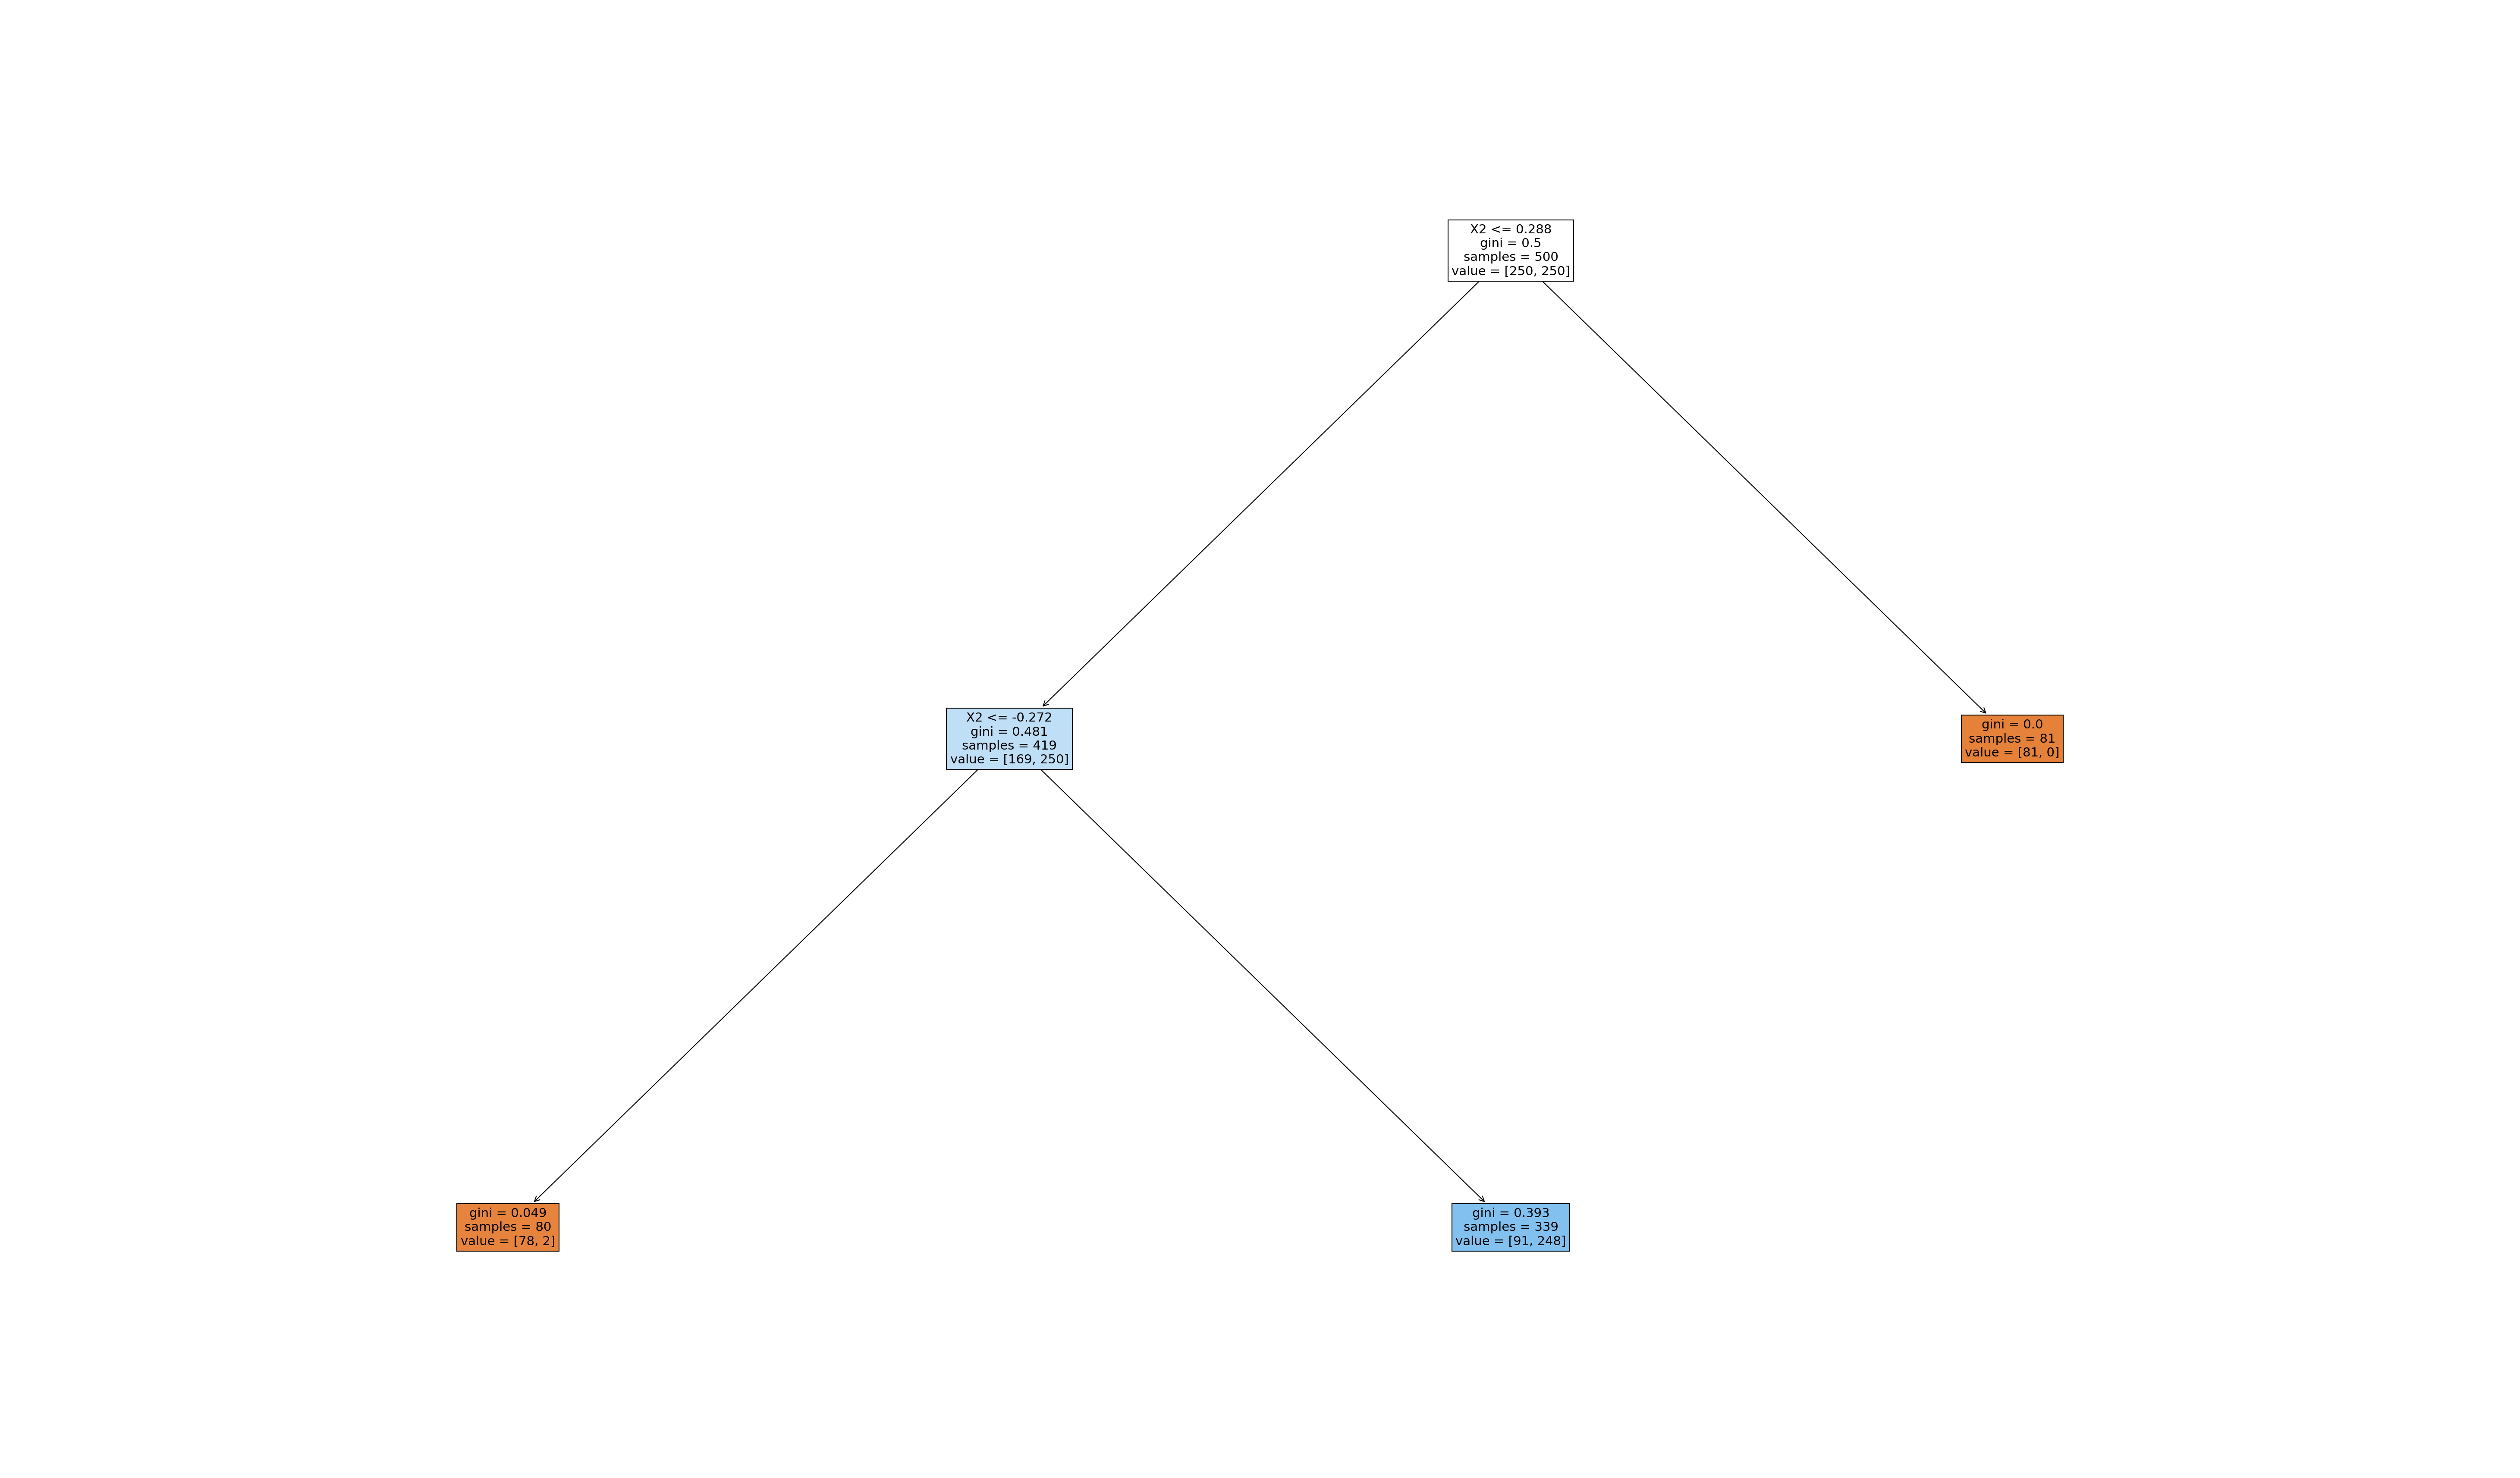

In [42]:
plt.figure(figsize=(50,30), dpi=150)
plot_tree(tree, feature_names=["X1", "X2"], filled=True, fontsize=14)
plt.show()

In [41]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_tree",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"],
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")

## SVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [43]:
from sklearn.svm import SVC

In [44]:
c = 1
kernel = 'rbf'
degree = 2

svc = SVC(C=c, kernel=kernel, degree=degree, random_state=42)
svc.fit(X=train[["X1", "X2"]], y=train["y"])

SVC(C=1, degree=2, random_state=42)

In [45]:
train["y_svc"] = pd.Series(svc.predict(train[["X1", "X2"]]), dtype="category")
test["y_svc"] = pd.Series(svc.predict(test[["X1", "X2"]]), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_svc"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_svc"]),2)}')

Train Accuracy: 1.0
Test Accuracy: 1.0


In [46]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_svc"])

,0 Pred,1 Pred
0 True,250,0
1 True,0,250


In [47]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_svc",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"],
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")

## Neural Nets

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
# Definiciones del entrenamiento e hiperparámetros.
LOSS = "binary_crossentropy"
BATCH_SIZE = 20
EPOCHS = 45
LR = 0.1

# Paso 0: Iniciamos los parámetros aleatorios.
tf.random.set_seed(123)
initial_weights = keras.initializers.RandomNormal(0, 0.05, 123)

# Paso 1: Definimos la arquitectura de la red neuronal.
# Para este caso definimos dos capas, una capa de input y una capa de output.
inputs = keras.Input(shape=(2,), name="input")
hidden = keras.layers.Dense(3, activation="sigmoid", kernel_initializer=initial_weights, name="hidden") (inputs)
outputs = keras.layers.Dense(1, activation="sigmoid", kernel_initializer=initial_weights, name="output")(hidden)

# Paso 2: Construimos el modelo uniendo capas.
nn = keras.Model(inputs, outputs)

# Paso 3: Compilamos el modelo eligiendo la función a optimizar y el método de optimización.
nn.compile(optimizer=keras.optimizers.Adam(learning_rate=LR), loss=LOSS, metrics=["accuracy"])

# Paso 4: Entrenamos el modelo.
fit_history = nn.fit(x=train[["X1", "X2"]],
                     y=train["y"],
                     batch_size=BATCH_SIZE,
                     epochs=EPOCHS,
                     verbose=False,
                     shuffle=True)


In [50]:
nn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 hidden (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [51]:
px.line(data_frame=pd.DataFrame(fit_history.history),
        x=np.arange(0,EPOCHS),
        y="accuracy",
        color_discrete_sequence=["#3d5a80"],
        height=500,
        width=800,
        template="plotly_white").show()

px.line(data_frame=pd.DataFrame(fit_history.history),
        x=np.arange(0,EPOCHS),
        y="loss",
        color_discrete_sequence=["#3d5a80"],
        height=500,
        width=800,
        template="plotly_white").show()

In [52]:
train["y_nn"] = pd.Series(nn.predict(train[["X1", "X2"]], verbose=False).ravel().round().astype("int"), dtype="category")
test["y_nn"] = pd.Series(nn.predict(test[["X1", "X2"]], verbose=False).ravel().round().astype("int"), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_nn"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_nn"]),2)}')

Train Accuracy: 0.99
Test Accuracy: 0.98


In [53]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_nn"])

,0 Pred,1 Pred
0 True,249,1
1 True,3,247


In [54]:
px.scatter(data_frame=test,
           x="X1",
           y="X2",
           color="y_nn",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"],
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")

In [55]:
nn_features = keras.Model(inputs=nn.inputs,
                          outputs=[layer.output for layer in nn.layers[1:]])

In [56]:
multi_preds = nn_features.predict(train[["X1", "X2"]], verbose=False)

In [57]:
print(train[["X1", "X2"]].shape)
print(multi_preds[0].shape)
print(multi_preds[1].shape)

(500, 2)
(500, 3)
(500, 1)


In [59]:
hidden_features = pd.DataFrame(multi_preds[0], columns=["x1", "y1" , "z1"])

In [61]:
px.scatter_3d(data_frame=hidden_features,
              x="x1",
              y="y1",
              z="z1",
              color=train["y"],
              #range_x=[-0.5, 1.5],
              #range_y=[-0.5, 1.5],
              #range_z=[-0.5, 1.5],
              color_discrete_sequence=["#3d5a80", "#ff6700"],
              template="plotly_white").update_traces(marker_size = 5).show()

px.scatter(data_frame=hidden_features,
           x="x1",
           y="y1",
           symbol=train["y"],
           color=nn.predict(train[["X1", "X2"]], verbose=False).ravel(),
           #color_continuous_scale="viridis",
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white").show()

px.scatter(data_frame=train,
           x="X1",
           y="X2",
           symbol="y",
           color=nn.predict(train[["X1", "X2"]], verbose=False).ravel(),
           color_continuous_scale="viridis",
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white").show()

In [207]:
train["X1"]

0     -0.106837
1      0.378104
2      0.072464
3     -0.220479
4      0.021514
         ...   
495   -0.355434
496   -0.481449
497    0.545953
498    0.561732
499    0.682795
Name: X1, Length: 500, dtype: float64

# Feature Engineering



In [65]:
train["R"] = np.sqrt(train["X1"]**2 + train["X2"]**2)
train["alpha"] = np.arctan2(train["X1"], train["X2"])

In [66]:
px.scatter(train,
           "alpha",
           "R",
           color = "y",
           template="plotly_white")

In [75]:
logistic = LogisticRegression()
logistic.fit(train[["R"]], train["y"])

LogisticRegression()

In [82]:
# Guardamos en los sets de train y test sus predicciones para cada observación.
train["y_logistic"] = pd.Series(logistic.predict(train[["R"]]), dtype="category")
test["y_logistic"] = pd.Series(logistic.predict(test[["R"]]), dtype="category")

# Imprimimos las métricas para evaluar el ajuste del modelo.
print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_logistic"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_logistic"]),2)}')

Train Accuracy: 1.0
Test Accuracy: 0.66
